# Kaggle Spaceship Titanic
## EDA & Preprocessing
### 데이터 셋
[Kaggle Spaceship Titanic](https://www.kaggle.com/competitions/spaceship-titanic/data)

### 사용 라이브러리

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
import random
import glob

import warnings
warnings.filterwarnings("ignore")

### Data Load

In [2]:
path = glob.glob("data/*")
path

['data\\sample_submission.csv', 'data\\test.csv', 'data\\train.csv']

In [3]:
train = pd.read_csv(path[2])
test = pd.read_csv(path[1])
sub = pd.read_csv(path[0])

train.shape, test.shape

((8693, 14), (4277, 13))

### EDA
#### 기본 정보

In [4]:
display(train.head(3))
display(test.head(3))

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus


- `PassengerID`: `ggg-pp` 포멧, ggg는 함께 여행하는 그룹, pp는 그룹내의 번호
- `HomePlanet`: 출발 행성
- `CryoSleep`: 극저온 수면 여부, 극저온 수면 중인 경우 객실에 있음
- `Cabin`: `deck/num/side` 포멧, 객실 번호
  - `side`: P=Port, S=Starboard
- `Destination`: 도착지
- `Age`
- `VIP`
- `RoomService, FoodCourt, ShoppingMall, Spa, VRDeck`: 편의시설 이용 여부 (요금 청구 내역)
- `Name`
- `Transported`: 다른 차원으로 이송되었는지 여부 (목표 값)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


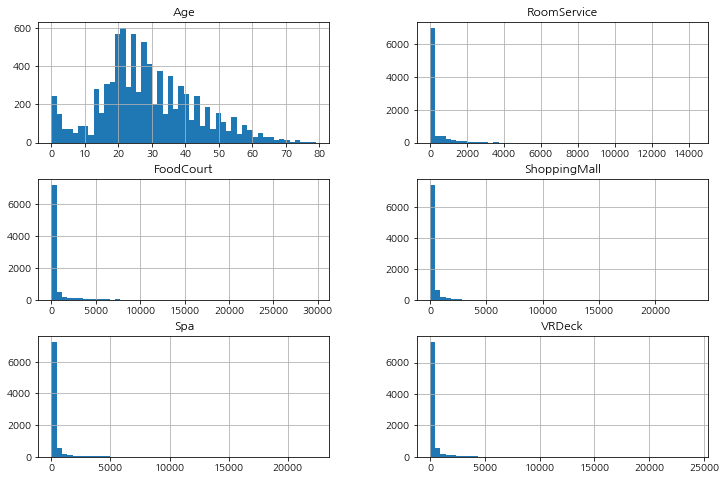

In [7]:
_ = train.hist(bins=50, figsize=(12, 8))

#### 결측치 확인

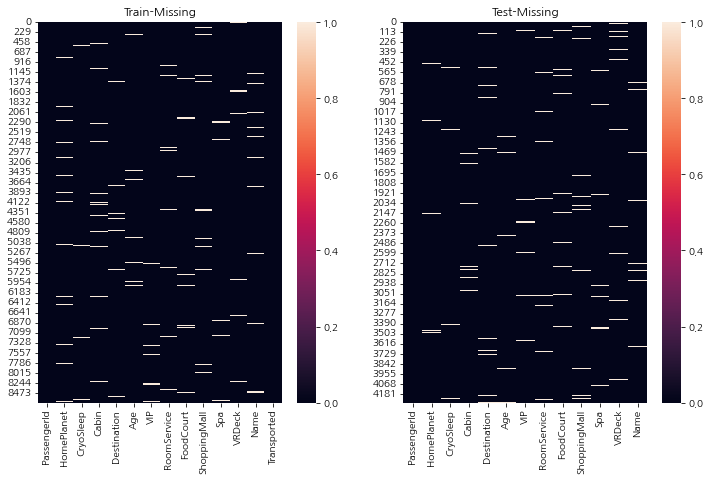

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(12, 7))
sns.heatmap(train.isnull(), ax=ax[0]).set_title("Train-Missing")
sns.heatmap(test.isnull(), ax=ax[1]).set_title("Test-Missing")
plt.show()

In [9]:
temp_train = train.isnull().mean()*100
temp_test = test.isnull().mean()*100

display(temp_train)
display(temp_test)

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64

PassengerId     0.000000
HomePlanet      2.034136
CryoSleep       2.174421
Cabin           2.338087
Destination     2.151040
Age             2.127660
VIP             2.174421
RoomService     1.917232
FoodCourt       2.478373
ShoppingMall    2.291326
Spa             2.361468
VRDeck          1.870470
Name            2.197802
dtype: float64

대략 2% 정도의 결측치가 존대함

#### 상관 관계
결측치 대체를 상관 관계를 이용해 처리할 예정

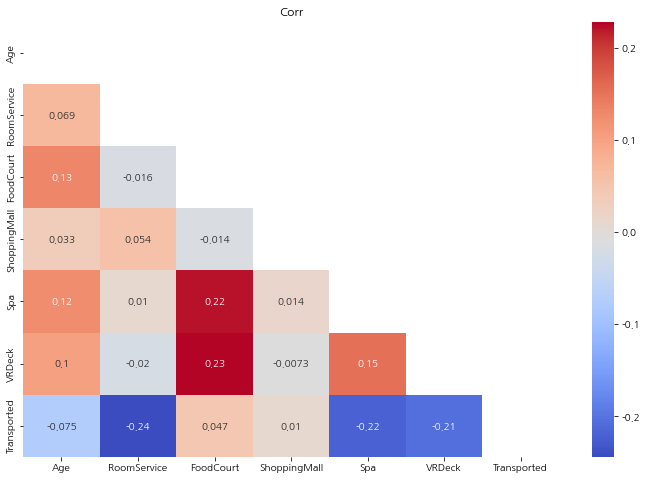

In [10]:
plt.figure(figsize=(12, 8))
_ = sns.heatmap(train.corr(), cmap="coolwarm", annot=True, mask=np.triu(np.ones_like(train.corr()))).set_title("Corr")

#### PassengerID
`ggg`의 경우 함께 여행하는 그룹을 의미하므로, 동반자 여부를 확인할 수 있을거라 생각됨  
`pp`는 개인 번호이므로 크게 의미가 없을것이라 생각


In [4]:
train["ggg"] = train["PassengerId"].str.split("_", expand=True)[0]
test["ggg"] = test["PassengerId"].str.split("_", expand=True)[0]

In [5]:
(train["ggg"].value_counts()>1).sum()

1412

In [13]:
(train["ggg"].value_counts()>1).sum() / train["ggg"].count() * 100

16.242954101000805

In [14]:
(test["ggg"].value_counts()>1).sum() / test["ggg"].count() * 100

16.90437222352116

1412명, 약 16% 정도는 일행이 있음  
이를 바탕으로, 일행 수를 나타내는 파생 변수를 생성

In [6]:
ggg_num_train, ggg_num_test = train["ggg"].value_counts().sort_index(), test["ggg"].value_counts().sort_index()

train["ggg"] = train["ggg"].apply(lambda x: ggg_num_train[x])
test["ggg"] = train["ggg"].apply(lambda x: ggg_num_test[x])

In [7]:
display(train["ggg"].sample(3))
display(test["ggg"].sample(3))

7004    1
207     7
2897    3
Name: ggg, dtype: int64

2134    1
678     1
2535    1
Name: ggg, dtype: int64

#### HomePlanet

In [8]:
train["HomePlanet"].isnull().sum(), test["HomePlanet"].isnull().sum()

(201, 87)

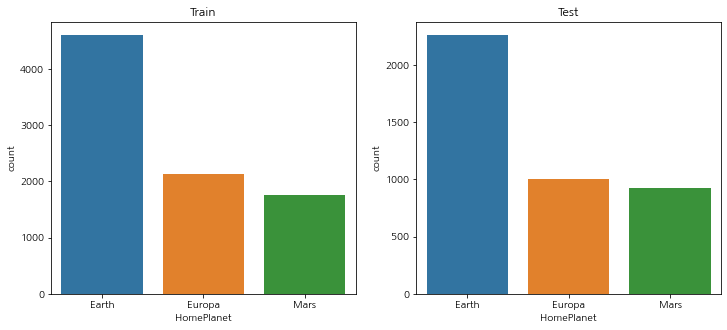

In [18]:
fig, ax =plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x=train["HomePlanet"].sort_values(), ax=ax[0]).set_title("Train")
sns.countplot(x=test["HomePlanet"].sort_values(), ax=ax[1]).set_title("Test")
plt.show()

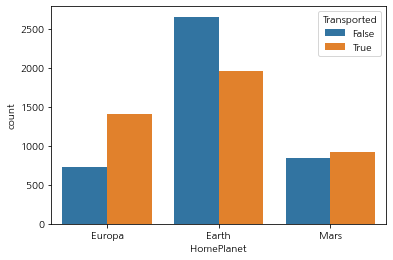

In [19]:
_ = sns.countplot(data=train, x="HomePlanet", hue="Transported")

결측치를 랜덤하게 설정

In [11]:
train["HomePlanet"].fillna(random.choice(train["HomePlanet"].unique()), inplace=True)
test["HomePlanet"].fillna(random.choice(test["HomePlanet"].unique()), inplace=True)

In [12]:
train["HomePlanet"].isnull().sum(), test["HomePlanet"].isnull().sum()

(0, 0)

#### Destination

In [13]:
train["Destination"].isnull().sum(), test["Destination"].isnull().sum()

(182, 92)

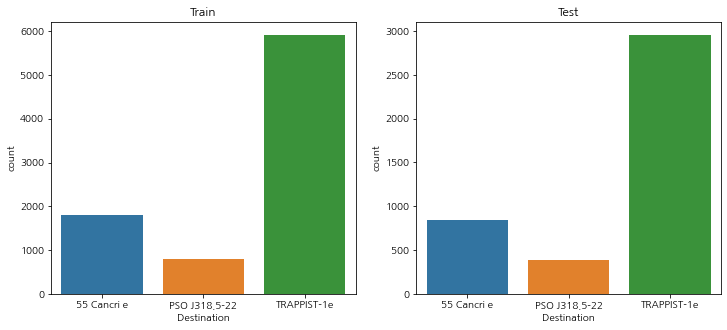

In [23]:
fig, ax =plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x=train["Destination"].sort_values(), ax=ax[0]).set_title("Train")
sns.countplot(x=test["Destination"].sort_values(), ax=ax[1]).set_title("Test")
plt.show()

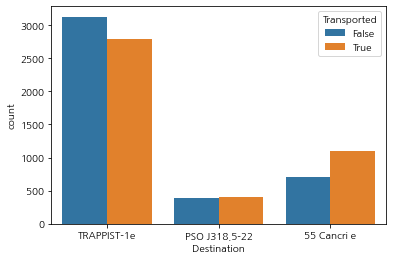

In [24]:
_ = sns.countplot(data=train, x="Destination", hue="Transported")

결측치를 랜덤하게 설정

In [14]:
train["Destination"].fillna(random.choice(train["Destination"].unique()), inplace=True)
test["Destination"].fillna(random.choice(test["Destination"].unique()), inplace=True)

In [15]:
train["Destination"].isnull().sum(), test["Destination"].isnull().sum()

(0, 0)

#### CryoSleep

In [16]:
train["CryoSleep"].isnull().sum(), test["CryoSleep"].isnull().sum()

(217, 93)

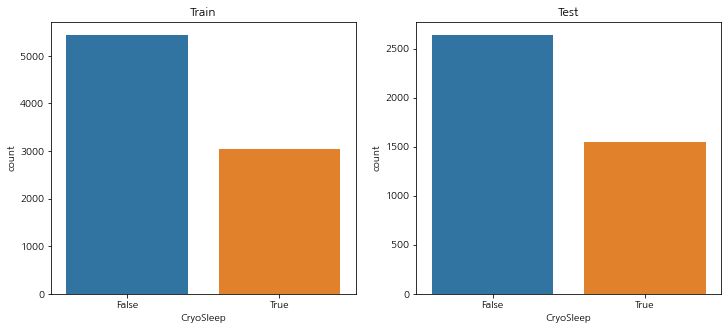

In [31]:
fig, ax =plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x=train["CryoSleep"].sort_values(), ax=ax[0]).set_title("Train")
sns.countplot(x=test["CryoSleep"].sort_values(), ax=ax[1]).set_title("Test")
plt.show()

#### 극저온 수면을 취하는 사람들은 전부 사망하지 않았을까?

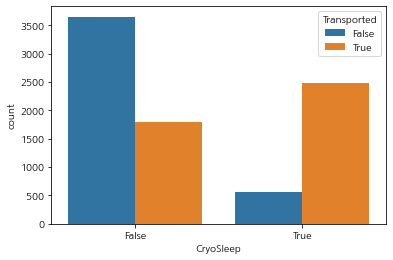

In [32]:
_ = sns.countplot(data=train, x="CryoSleep", hue="Transported")

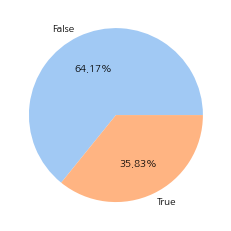

In [33]:
data = train.groupby("CryoSleep")["Transported"].count().values.tolist()
labels = train.groupby("CryoSleep")["Transported"].count().index.tolist()
colors = sns.color_palette('pastel')[0:2]

_ = plt.pie(data, labels=labels, colors=colors, autopct="%.2f%%")

8500여 명 중, 3000(36%)명 정도가 극저온 수면을 선택함

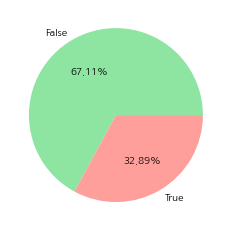

In [34]:
# 극저온 수면을하지 않은 그룹
data = train.groupby("CryoSleep")["Transported"].value_counts()[0].values.tolist()
labels = train.groupby("CryoSleep")["Transported"].value_counts()[0].index.tolist()
colors = sns.color_palette('pastel')[2:4]

_ = plt.pie(data, labels=labels, colors=colors, autopct="%.2f%%")

극저온 수면을하지 않은 사람들의 약 67%는 생존했음

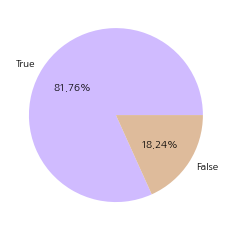

In [35]:
# 극저운 수면을한 그룹
data = train.groupby("CryoSleep")["Transported"].value_counts()[1].values.tolist()
labels = train.groupby("CryoSleep")["Transported"].value_counts()[1].index.tolist()
colors = sns.color_palette('pastel')[4:6]

_ = plt.pie(data, labels=labels, colors=colors, autopct="%.2f%%")

극저온 수면을 한 사람들의 약 18%는 사망했음

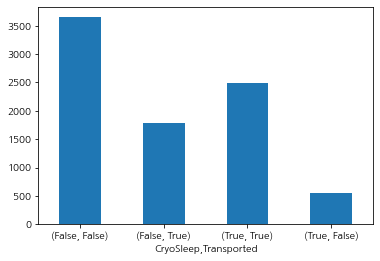

In [36]:
_ = train.groupby("CryoSleep")["Transported"].value_counts().plot.bar(rot=0)

극저온 수면을 선택한 사람들의 사망 비율이 높다는 것을 확인 할 수 있음  
`train`의 `CryoSleep`의 결측치는 해당 정보를 이용해 보완해 줄 수 있을 것 같음

#### 극저온 수면을 선택한 사람들의 출발/도착 행성은?

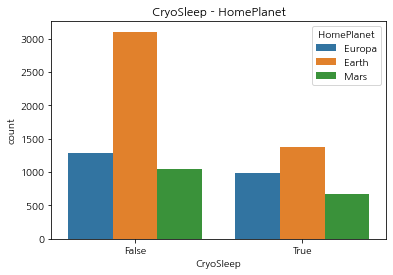

In [37]:
_ = sns.countplot(data=train, x="CryoSleep", hue="HomePlanet").set_title("CryoSleep - HomePlanet")

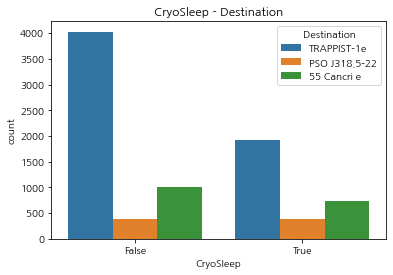

In [38]:
_ = sns.countplot(data=train, x="CryoSleep", hue="Destination").set_title("CryoSleep - Destination")

출발지/도착지와 극저온 수면 선택 여부는 크게 상관이 없어보임  
단순히, 지구 출발자와 TRAPPIST-1e가 도착지인 사람들이 많이 선택했음


In [39]:
train.groupby("Destination")["CryoSleep"].value_counts(normalize=True)*100

Destination    CryoSleep
55 Cancri e    False        57.915718
               True         42.084282
PSO J318.5-22  False        50.707851
               True         49.292149
TRAPPIST-1e    False        67.777217
               True         32.222783
Name: CryoSleep, dtype: float64

위 확률을 이용해 랜덤하게 부여할 예정

#### 거리와 상관있지 않을까?
출발지는 `Earth, Mars, Europa`,  
도착지는 `TRAPPIST-1e, PSO J318.5-22, 55 Cancri e`

- `Mars`는 지구로부터 약 0.000042 광년 떨어져 있음  
- `Europa`는 지구로부터 약 0.000066 광년 떨어져 있음  
- `TRAPPIST-1e`는 지구로부터 약 39.6 광년 떨어져 있음  
- `PSO J318.5-22`는 지구로부터 약 80광년 떨어져 있음  
- `55 Cancri e`는 지구로부터 약 40.9광년 떨어져 있음  

사실상 목저지만 이용해도 될 것 같음


위, `Destination` 파트에서 봤듯이 `Transported`와 크게 상관이 없는 것으로 보임  

`train`의 `CryoSleep`은 `Transported`를 바탕으로 결측치를 채우고,  
`test`의 `CryoSleep`은 `Destination`을 바탕으로 채워줌

In [17]:
# train
def base_Transported(cols):
    Cryosleep, Transported = cols[0], cols[1]
    # Cryosleep이 결측치면,
    if pd.isnull(Cryosleep):
        if Transported: return True # 사망했다면 True
        else: return False # 사망하지 않았다면 False
    else: return Cryosleep # 결측치가 아닌 경우 그대로 반환

In [18]:
train["CryoSleep"] = train[["CryoSleep", "Transported"]].apply(base_Transported, axis=1)

In [19]:
# test
def base_Destination_proba(cols):
    Cryosleep, Destination = cols[0], cols[1]
    if pd.isnull(Cryosleep):
        if Destination=="TRAPPIST-1e":
            return random.choices([True, False], weights=[0.33, 0.67])[-1]
        elif Destination=="55 Cancri e":
            return random.choices([True, False], weights=[0.41, 0.59])[-1]
        else:
            return random.choices([True, False], weights=[0.49, 0.51])[-1]
    else: return Cryosleep

In [20]:
test["CryoSleep"] = test[["CryoSleep", "Destination"]].apply(base_Destination_proba, axis=1)

In [21]:
train["CryoSleep"].isnull().sum(), test["CryoSleep"].isnull().sum()

(0, 0)

#### Cabin
`deck/num/side` 형식을 가지고 있음  

In [22]:
train["Cabin"].isnull().sum(), test["Cabin"].isnull().sum()

(199, 100)

In [23]:
train[train["Cabin"].duplicated()].iloc[:5]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,ggg
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,2
10,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True,3
11,0008_03,Europa,False,B/1/P,55 Cancri e,45.0,False,39.0,7295.0,589.0,110.0,124.0,Wezena Flatic,True,3
22,0020_02,Earth,True,E/0/S,55 Cancri e,49.0,False,0.0,0.0,0.0,0.0,0.0,Glendy Brantuarez,False,6
23,0020_03,Earth,True,E/0/S,55 Cancri e,29.0,False,0.0,0.0,NaN,0.0,0.0,Mollen Mcfaddennon,False,6


같은 객실을 사용한 사람들은 같은 그룹에 속해있는 사람임  
`deck`과 `side` 정보만 파생변수로 만들어 사용함  
결측치 처리를 위해 결측치가 없는 데이터만 일부 먼저 사용


In [24]:
temp = train[~train["Cabin"].isnull()]
temp.shape

(8494, 15)

In [25]:
temp["Deck"] = temp["Cabin"].apply(lambda x: x.split("/")[0])
temp["Side"] = temp["Cabin"].apply(lambda x: x.split("/")[-1])

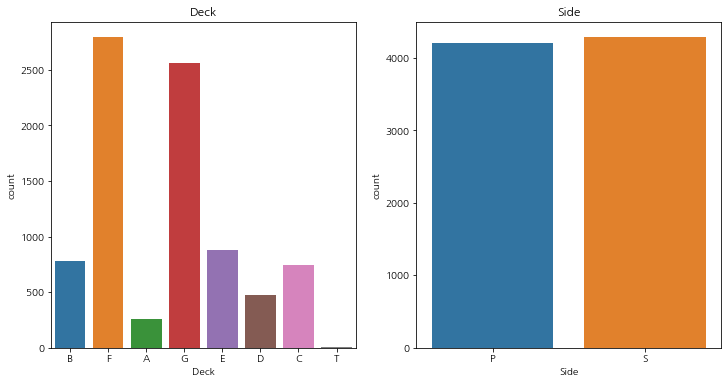

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(x=temp["Deck"], ax=ax[0]).set_title("Deck")
sns.countplot(x=temp["Side"], ax=ax[1]).set_title("Side")
plt.show()

`Deck`과 달리, `Side`는 거의 균일하게 분포되어 있음  
규모가 다를까라는 의문이 생김

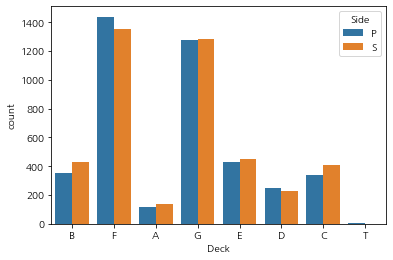

In [27]:
_ = sns.countplot(data=temp, x="Deck", hue="Side")

`Side`에 따라 `Deck`도 비교적 균일하게 분포되어있음 -> 규모도 거의 동일

In [28]:
temp.groupby("Transported")["Deck"].value_counts(normalize=True)*100

Transported  Deck
False        F       37.120493
             G       29.364326
             E       13.353890
             D        6.427894
             C        5.668880
             B        4.909867
             A        3.059772
             T        0.094877
True         G       30.878915
             F       28.728378
             B       13.370734
             C       11.874708
             E        7.316503
             D        4.838710
             A        2.968677
             T        0.023375
Name: Deck, dtype: float64

In [29]:
temp.groupby("Transported")["Side"].value_counts(normalize=True)*100

Transported  Side
False        P       54.743833
             S       45.256167
True         S       55.633474
             P       44.366526
Name: Side, dtype: float64

In [30]:
# train
def base_Transported_proba(cols):
    Cabin, Transported = cols[0], cols[1]
    if pd.isnull(Cabin):
        if Transported:
            Deck = random.choices(["G", "F", "B", "C", "E", "D", "A", "T"], weights=[0.31, 0.29, 0.13, 0.12, 0.07, 0.05, 0.03, 0.002])[0]
            Side = random.choices(["P", "S"], weights=[0.56, 0.44])[0]
            return f"{Deck}/{Side}"
        else:
            Deck = random.choices(["F", "G", "E", "D", "C", "B", "A", "T"], weights=[0.37, 0.29, 0.13, 0.06, 0.05, 0.04, 0.03, 0.001])[0]
            Side = random.choices(["P", "S"], weights=[0.55, 0.45])[0]
            return f"{Deck}/{Side}"
    else: return Cabin

In [31]:
train["Cabin"] = train[["Cabin", "Transported"]].apply(base_Transported_proba, axis=1)

`train`의 `Cabin`은 위 2개의 표를 이용해 랜덤하게 채워줌  

In [32]:
temp["Deck"].value_counts(normalize=True)*100

F    32.893807
G    30.127149
E    10.313162
B     9.171180
C     8.794443
D     5.627502
A     3.013892
T     0.058865
Name: Deck, dtype: float64

In [33]:
temp["Side"].value_counts(normalize=True)*100

S    50.482694
P    49.517306
Name: Side, dtype: float64

In [34]:
# test
test["Cabin"].fillna(str(random.choices(["F", "G", "E", "B", "C", "D", "A", "T"], weights=[0.33, 0.30, 0.1, 0.09, 0.09, 0.06, 0.03, 0.0006])[0]) \
    + "/" + str(random.choices(["S", "P"], weights=[0.5, 0.5])[0]), inplace=True)

In [35]:
train["Cabin"].isnull().sum(), test["Cabin"].isnull().sum()

(0, 0)

`test`의 `Cabin`은 위 2개의 표를 이용해 랜덤하게 채워줌

In [36]:
train["Deck"] = train["Cabin"].apply(lambda x: x.split("/")[0])
train["Side"] = train["Cabin"].apply(lambda x: x.split("/")[-1])

test["Deck"] = test["Cabin"].apply(lambda x: x.split("/")[0])
test["Side"] = test["Cabin"].apply(lambda x: x.split("/")[-1])

#### Age

In [41]:
train["Age"].isnull().sum(), test["Age"].isnull().sum()

(179, 91)

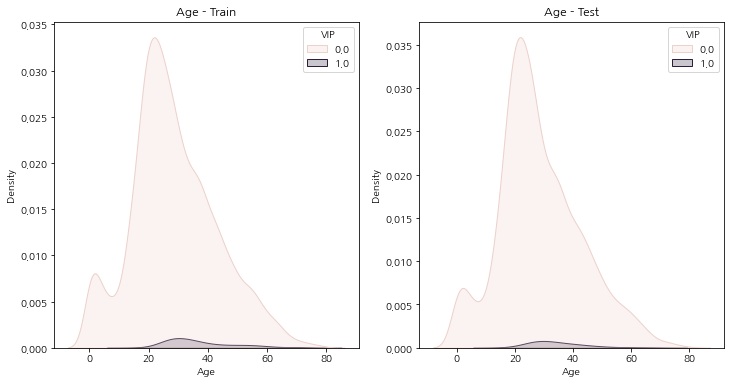

In [57]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.kdeplot(data=train, x="Age", hue="VIP", shade=True, ax=ax[0]).set_title("Age - Train")
sns.kdeplot(data=test, x="Age", hue="VIP", shade=True, ax=ax[1]).set_title("Age - Test")
plt.show()

In [58]:
train.groupby("VIP")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
VIP,,,,,,,,
False,8119.0,28.639611,14.469895,0.0,19.0,27.0,38.0,79.0
True,198.0,37.449495,11.611957,18.0,29.0,34.0,44.0,73.0


In [59]:
test.groupby("VIP")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
VIP,,,,,,,,
False,4023.0,28.487447,14.238827,0.0,19.0,26.0,37.0,79.0
True,73.0,34.534247,9.771106,18.0,27.0,32.0,39.0,67.0


`VIP` 여부를 이용해 결측치를 채워줌

In [60]:
def age_by_VIP(cols):
    age, vip = cols[0], cols[1]
    if pd.isna(age):
        if vip: return 35
        else: return 28
    else: return age

In [61]:
train["Age"] = train[["Age", "VIP"]].apply(age_by_VIP, axis=1)
test["Age"] = test[["Age", "VIP"]].apply(age_by_VIP, axis=1)

In [62]:
train["Age"].isnull().sum(), test["Age"].isnull().sum()

(0, 0)

`band_age` 컬럼을 생성

In [71]:
train["Band_Age"] = train["Age"].apply(lambda x: int(str(x)[0]+"0"))
test["Band_Age"] = test["Age"].apply(lambda x: int(str(x)[0]+"0"))

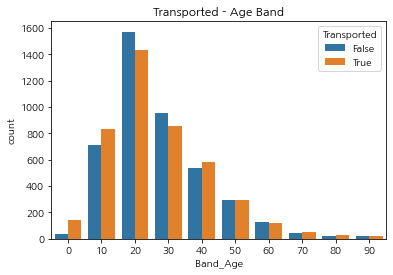

In [77]:
_ = sns.countplot(data=train, x="Band_Age", hue="Transported").set_title("Transported - Age Band")

20대 미만 -> `child`  
20~40대 -> `adult`  
40~60대 -> `middle`  
60대~ -> `old`

In [78]:
def age_str(col):
    if col in [0, 10]: return "child"
    elif col in [20, 40]: return "adult"
    elif col in [50, 60]: return "middle"
    else: return "old"

In [79]:
train["Band_Age"] = train["Band_Age"].apply(age_str)
test["Band_Age"] = test["Band_Age"].apply(age_str)

#### VIP

In [63]:
train["VIP"].isnull().sum(), test["VIP"].isnull().sum()

(203, 93)

`adult, middle`이면 `True`, 아니면 `False`로 결측치를 대체함

In [81]:
def base_band_VIP(cols):
    band, vip = cols[0], cols[1]
    
    if pd.isna(vip):
        if band in ["adult", "middle"]: return True
        else: return False
    else: return vip

In [83]:
train["VIP"] = train[["Band_Age", "VIP"]].apply(base_band_VIP, axis=1)
test["VIP"] = test[["Band_Age", "VIP"]].apply(base_band_VIP, axis=1)

In [84]:
train["VIP"].isnull().sum(), test["VIP"].isnull().sum()

(0, 0)

#### 실수형 변수

In [85]:
nums = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]

In [89]:
train[nums].isnull().sum()

RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
dtype: int64

In [90]:
test[nums].isnull().sum()

RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
dtype: int64

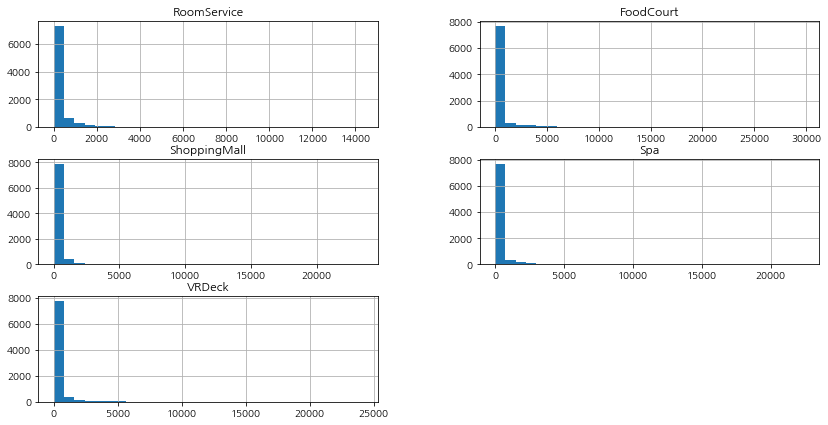

In [102]:
_ = train[nums].hist(bins=30, figsize=(14, 7))

이용 여부로 변경해도 좋을꺼 같다는 생각을 함

In [123]:
train[nums] = train[nums].fillna(0)
test[nums] = test[nums].fillna(0)

In [131]:
train["Service"] = train[nums].sum(axis=1)
test["Service"] = test[nums].sum(axis=1)

In [134]:
train["Service"] = train["Service"].apply(lambda x: False if x==0 else True)
test["Service"] = test["Service"].apply(lambda x: False if x==0 else True)

In [135]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,ggg,Deck,Side,Band_Age,Service
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,B,P,old,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,F,S,adult,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,2,A,S,middle,True
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,2,A,S,old,True
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,F,S,child,True


### 불필요한 열 삭제

In [136]:
drop_list = ["PassengerId", "Cabin", "Age", "Name"]
drop_list.extend(nums)
drop_list

['PassengerId',
 'Cabin',
 'Age',
 'Name',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck']

In [137]:
train.drop(columns=drop_list, axis=1, inplace=True)
test.drop(columns=drop_list, axis=1, inplace=True)

In [141]:
train.to_csv("data/pre_train.csv", index=False)
test.to_csv("data/pre_test.csv", index=False)